In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-yearperiod#!ds=22r0&display=line

Hint:

Following is the command import packages and data

from pandas import read_csv

from pandas import datetime

from matplotlib import pyplot

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

def parser(x):

    return datetime.strptime('190'+x, '%Y-%m')
    
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [5]:
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


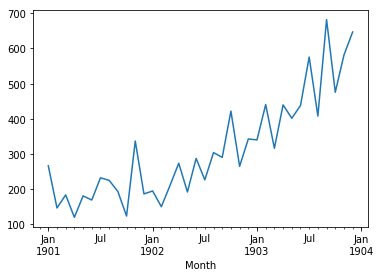

In [7]:
print(series.head())
series.plot()
pyplot.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [9]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [10]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [11]:
train, test = X[0:size], X[size:len(X)]

In [12]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Jee\Misc\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Jee\Misc\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

predicted=272.964471, expected=421.600000
predicted=290.313809, expected=264.500000
predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test MSE: 7547.808


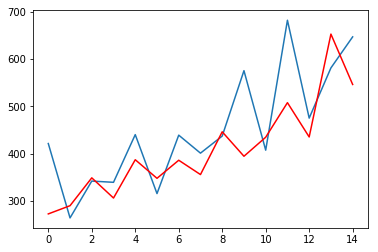

In [13]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()